# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
def loadData():
  # The column names are adopted from the dataset page on Kaggle  
  HOUSING_PATH = os.path.join("trainData") 
  csv_path = os.path.join(HOUSING_PATH, "insurance.csv")
  housing = pd.read_csv(csv_path)
  return housing
  

trainingData = loadData()
  

In [ ]:
trainingData.head(9)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070


In [ ]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
trainingData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING 

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa43ec20550>,
      dtype=object)

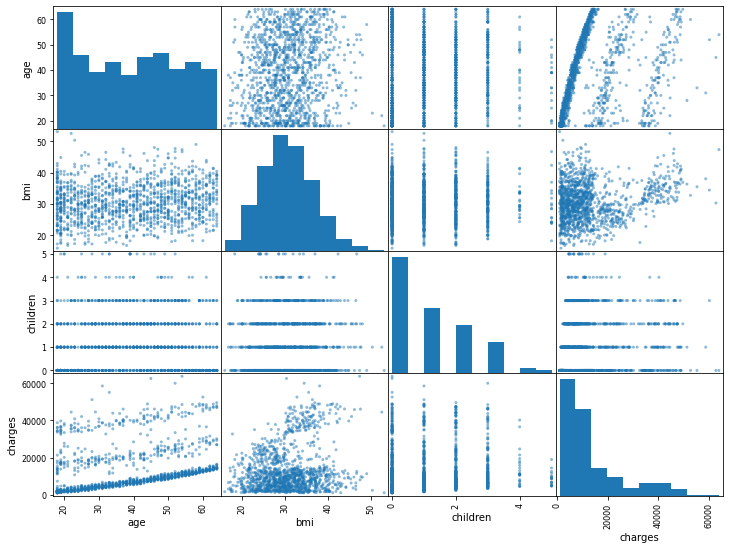

In [ ]:
from pandas.plotting import scatter_matrix
attributes = list(trainingData)

scatter_matrix(trainingData[attributes], figsize=(12, 9))

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(trainingData, test_size=0.2, random_state=42)

# Your code goes here for this section.
X_train = train_set.drop("charges", axis=1)
y_train = train_set["charges"].copy()
#y_train = train_set["charges"].copy()
X_test = test_set.drop("charges", axis=1)
y_test = test_set["charges"].copy()

num_data = X_train.select_dtypes(include=[np.number])
cat_data = X_train.select_dtypes(include=[object])

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Xnum_train_tr = num_pipeline.fit_transform(num_data)
Xnum_test_tr = num_pipeline.fit_transform(num_data)
Xnum_train_tr

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(num_data)
cat_attribs = list(cat_data)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared_tr = full_pipeline.fit_transform(X_train)
X_prepared_test = full_pipeline.fit_transform(X_test)
print(X_train.shape)
print(X_prepared_tr.shape)

(1070, 6)
(1070, 11)


In [ ]:
X_prepared_tr

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT 
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [178]:
from re import X
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = np.random.randn(11)
    self.m = len(X_train) # parameter vector;
    self.alpha = 0.1 # learning rate
    self.cost = (2/self.m) * X_prepared_tr.T.dot(X_prepared_tr.dot(self.theta) - y_train) # cost function

    self.itr = []
    self.mse = []

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations
    """

    """
    OUTPUT: 
    theta: updated value for theta
    cost: value of the cost function
    """
    
    """
    Including theta_0 values
    X_train = np.c_[np.ones((1070,1)),X_train]
    self.theta = np.random.rand(12)
    self.m = len(X_train)
    """
    # implementation code here
    self.theta = theta
    y_train = y_train.to_numpy();
    self.itr = []
    self.mse = []
    for iteration in range(iters):
      gradients = (2/self.m) * (X_train.T.dot((X_train.dot(theta)) - y_train))
      theta = theta - (alpha * gradients)
      mse = np.sum((X_train.dot(theta) - y_train) ** 2) / self.m
      self.cost = mse
      if iteration % 2 == 0:
        self.itr.append(iteration)
        self.mse.append(self.cost)

    self.theta = theta
    return self

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    # implementation code here
    return self.gradientDescent(X_train,y_train,self.theta,self.alpha, iters=1000)

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.
    X_b = np.c_[np.ones((1070,1)), X_train]
    self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

  def predict(self, X_test, using_GD):
    """
    Predicting the label
    """
    # implementation code here
    if not using_GD:
      X_test = np.c_[np.ones((len(X_test),1)),X_test]
    return X_test.dot(self.theta)
    

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    return "Parameter vector is %f" % self.theta[0]

# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()   

Parameter vector is 0.091865


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

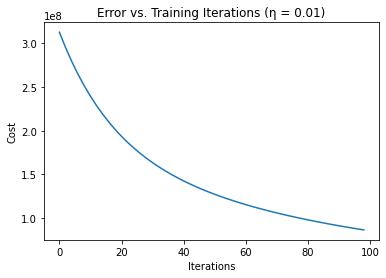

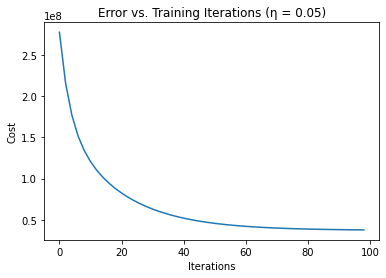

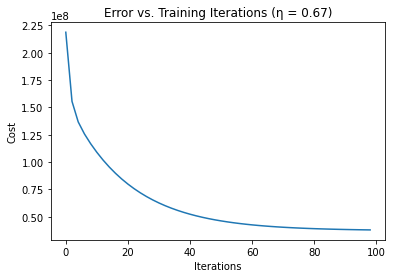

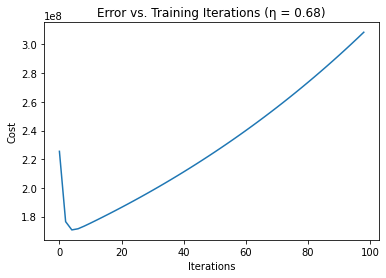

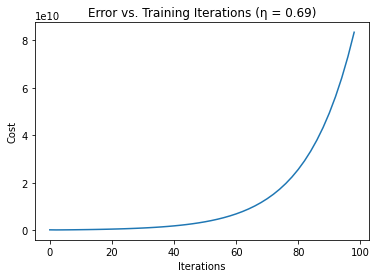

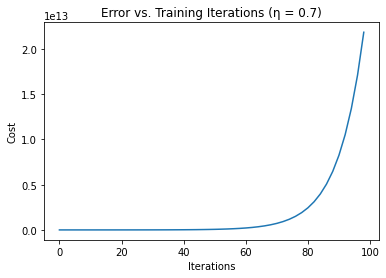

In [174]:

# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
theta = np.random.randn(11)
etas = [0.01, 0.05, 0.67, 0.68, 0.69, 0.70]
for eta in etas:
  model = myGradientDescentModel.gradientDescent(X_prepared_tr, y_train, theta, eta, 100)
  plt.plot(model.itr, model.mse)
  plt.xlabel('Iterations')  
  plt.ylabel('Cost')  
  plt.title("Error vs. Training Iterations (\u03B7 = " + str(eta) + ")")
  plt.show()

By the looks of it, η = 0.68 is the most optimal value since you see the largest downward spike in the cost, meaning it converged

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_prepared_tr, y_train)

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS 

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [176]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

# Use the built-in SGD Regressor model
mySGDModel = SGDRegressor()
mySGDModel.fit(X_prepared_tr,y_train)
y_predict = mySGDModel.predict(X_prepared_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

5791.4780632451975


In [177]:
# myGradientDescentModel_rmse
myGDModel = MyLinearRegression()
myGDModel.fitUsingGradientDescent(X_prepared_tr, y_train)    
y_predict_GD = myGDModel.predict(X_prepared_test, True)
mse_GD = mean_squared_error(y_test,y_predict_GD)
myGDModel_rmse = np.sqrt(mse_GD)
print(myGDModel_rmse)

5795.33253301876


In [ ]:
# myNormalEquationModel_rmse
myNEModel = MyLinearRegression();
myNEModel.fitUsingNormalEquation(X_prepared_tr, y_train)
y_predict_NE = myNEModel.predict(X_prepared_test, False)
mse_NE = mean_squared_error(y_test,y_predict_NE)
myNEModel_rmse = np.sqrt(mse_NE)
print(myNEModel_rmse)

5795.332533018759


- - -
## Task 6. PRESENT YOUR SOLUTION 

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [ ]:
# Your paragraph goes here for this section

My main takeaways from this project are becoming familiar with various linear regression improvement techniques. Some of these include batch gradient descent, stochastic gradient descent, and utilizing the normal equation to find a closed-form solution. These methods were applied to insurance data to try and best predict the charges someone will receive from medical insurance. Overall, the RMSE values for these three techniques were very similar, which can perhaps be attributed to the fact that there isn't enough data in the sample or not enough iterations were ran for the respective RMSE values to converge to their actual values. Since these gradient descent models run faster and slower depenging on whether or not there are more/less features or more/less data points, in the future we could potentially get more use out of each individual method by changing both of those values to get more accurate values, since the runtime for these three are approximately equal (although the batch GD does run slower, indicating that the number of data points is pretty large). While the RMSE values did provide something to go off of when predicting, the RMSE values were around half of the value of the data that we were analyzing. To improve this, in the future we could try different gradient descent models and better fine-tune the hyperparameters.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!